# Project House Prices

Based on data of houses in the city of Ames in Iowa. The task is to create models to predict 500 house prices.
1. A "simple" model with two variables (three with the target variable) 
2. An "intermediate" model (between 10 and 20 variables).
3. A "complex model" with all variables.

## Data cleaning

In [1]:
import pandas as pd
data = pd.read_csv("house-prices.csv")

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2430 entries, 0 to 2429
Data columns (total 82 columns):
Order              2430 non-null int64
PID                2430 non-null int64
MS SubClass        2430 non-null int64
MS Zoning          2430 non-null object
Lot Frontage       2010 non-null float64
Lot Area           2430 non-null int64
Street             2430 non-null object
Alley              163 non-null object
Lot Shape          2430 non-null object
Land Contour       2430 non-null object
Utilities          2430 non-null object
Lot Config         2430 non-null object
Land Slope         2430 non-null object
Neighborhood       2430 non-null object
Condition 1        2430 non-null object
Condition 2        2430 non-null object
Bldg Type          2430 non-null object
House Style        2430 non-null object
Overall Qual       2430 non-null int64
Overall Cond       2430 non-null int64
Year Built         2430 non-null int64
Year Remod/Add     2430 non-null int64
Roof Style         24

In [3]:
# remove columns with >50% missing values
data.drop(['Alley','Pool QC', 'Fence', 'Misc Feature', 'Fireplace Qu'], axis=1, inplace=True)

In [4]:
import numpy as np
#number of missing values in each feature
def missing_values(data):
    series = data.isnull().sum()
    nans_keys = []
    nans_val = []
    for key in series.index:
        if series.loc[key]!=0:
            print(key, series.loc[key], '\t\t', type(data[key][0]))
            nans_keys.append(key)
            nans_val.append(series.loc[key])
    return np.array(nans_keys), np.array(nans_val)

nans_keys, nans_val = missing_values(data)

Lot Frontage 420 		 <class 'numpy.float64'>
Mas Vnr Type 20 		 <class 'str'>
Mas Vnr Area 20 		 <class 'numpy.float64'>
Bsmt Qual 71 		 <class 'str'>
Bsmt Cond 71 		 <class 'str'>
Bsmt Exposure 74 		 <class 'str'>
BsmtFin Type 1 71 		 <class 'str'>
BsmtFin SF 1 1 		 <class 'numpy.float64'>
BsmtFin Type 2 72 		 <class 'str'>
BsmtFin SF 2 1 		 <class 'numpy.float64'>
Bsmt Unf SF 1 		 <class 'numpy.float64'>
Total Bsmt SF 1 		 <class 'numpy.float64'>
Electrical 1 		 <class 'str'>
Bsmt Full Bath 2 		 <class 'numpy.float64'>
Bsmt Half Bath 2 		 <class 'numpy.float64'>
Garage Type 136 		 <class 'str'>
Garage Yr Blt 138 		 <class 'numpy.float64'>
Garage Finish 138 		 <class 'str'>
Garage Cars 1 		 <class 'numpy.float64'>
Garage Area 1 		 <class 'numpy.float64'>
Garage Qual 138 		 <class 'str'>
Garage Cond 138 		 <class 'str'>


In [5]:
nans_keys[nans_val<21]

array(['Mas Vnr Type', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Electrical', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Garage Cars', 'Garage Area'], dtype='<U14')

In [6]:
#remove all nans from columns with up to 20 missing values (a loss we can afford, <1%)
data.dropna(subset=nans_keys[nans_val<21], inplace=True)

In [7]:
#what is left
missing_values(data)

Lot Frontage 414 		 <class 'numpy.float64'>
Bsmt Qual 69 		 <class 'str'>
Bsmt Cond 69 		 <class 'str'>
Bsmt Exposure 72 		 <class 'str'>
BsmtFin Type 1 69 		 <class 'str'>
BsmtFin Type 2 70 		 <class 'str'>
Garage Type 135 		 <class 'str'>
Garage Yr Blt 136 		 <class 'numpy.float64'>
Garage Finish 136 		 <class 'str'>
Garage Qual 136 		 <class 'str'>
Garage Cond 136 		 <class 'str'>


(array(['Lot Frontage', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
        'BsmtFin Type 1', 'BsmtFin Type 2', 'Garage Type', 'Garage Yr Blt',
        'Garage Finish', 'Garage Qual', 'Garage Cond'], dtype='<U14'),
 array([414,  69,  69,  72,  69,  70, 135, 136, 136, 136, 136]))

In [8]:
#print unique values so that I can understand better how to replace the missing values
series = data.isnull().sum()
nans_keys = [] 
for key in series.index:
    if series.loc[key]!=0:
        print("Unique values for  %s: %s \n" %(key, data[key].unique()))

Unique values for  Lot Frontage: [ nan  75.  21.  70.  60.  45.  57.  98.  72.  55.  35.  95.  86.  96.
  63.  50.  47.  88. 108.  68. 112.  85.  77.  80.  58.  73.  32.  76.
 100.  54.  91.  78.  92. 128.  53. 120.  79. 118.  97.  69.  40.  82.
  90. 160.  67.  74.  93. 110.  52.  62.  39. 107.  24.  65.  51.  36.
  71.  61. 122.  64.  43.  83.  34.  44.  87.  66. 102.  48.  84. 104.
  94. 134.  56.  41. 103.  30. 106.  49. 105.  59.  89.  81. 125.  42.
 124. 140. 101. 138. 114. 121. 129. 130.  37. 200.  99. 126. 149.  38.
 152. 168. 313. 109.  46. 116. 155.  26. 174. 136.  33. 182. 119. 113.
 133. 195.  22.  31.  25. 141. 115. 150. 135.] 

Unique values for  Bsmt Qual: ['Gd' 'TA' 'Ex' nan 'Fa' 'Po'] 

Unique values for  Bsmt Cond: ['TA' 'Gd' 'Fa' nan 'Ex' 'Po'] 

Unique values for  Bsmt Exposure: ['No' 'Av' 'Mn' 'Gd' nan] 

Unique values for  BsmtFin Type 1: ['GLQ' 'Unf' 'Rec' 'LwQ' 'BLQ' 'ALQ' nan] 

Unique values for  BsmtFin Type 2: ['Unf' 'LwQ' 'BLQ' nan 'Rec' 'ALQ' 'GLQ'] 

Uniq

In [9]:
#For anything related to basement, NaN has a meaning (no basement), so replacing it with a string
for i in ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure','BsmtFin Type 1', 'BsmtFin Type 2']:
    data[i].fillna(value="NoBasement", inplace=True)     

In [10]:
missing_values(data)

Lot Frontage 414 		 <class 'numpy.float64'>
Garage Type 135 		 <class 'str'>
Garage Yr Blt 136 		 <class 'numpy.float64'>
Garage Finish 136 		 <class 'str'>
Garage Qual 136 		 <class 'str'>
Garage Cond 136 		 <class 'str'>


(array(['Lot Frontage', 'Garage Type', 'Garage Yr Blt', 'Garage Finish',
        'Garage Qual', 'Garage Cond'], dtype='<U13'),
 array([414, 135, 136, 136, 136, 136]))

In [11]:
#similarly for a garage
for i in ['Garage Type','Garage Finish', 'Garage Qual', 'Garage Cond']:
    data[i].fillna(value="NoGarage", inplace=True)    

In [12]:
missing_values(data)

Lot Frontage 414 		 <class 'numpy.float64'>
Garage Yr Blt 136 		 <class 'numpy.float64'>


(array(['Lot Frontage', 'Garage Yr Blt'], dtype='<U13'), array([414, 136]))

In [13]:
#numerical values left (lot frontage and year built), filling it with the average or the most frequent value
data['Lot Frontage'].fillna(value=data['Lot Frontage'].mean(), inplace=True)
most_freq = int(data['Garage Yr Blt'].value_counts().index[0])
data['Garage Yr Blt'].fillna(value=most_freq, inplace=True)

In [14]:
missing_values(data)

(array([], dtype=float64), array([], dtype=float64))

In [15]:
#would remove duplicated rows if present but
len(data[data.duplicated(data)==True])

0

In [16]:
#find numerical values and inspect which are encoded categories (cross-check with the documentation!)
numeric = data._get_numeric_data().columns
for num in numeric:
    print("%s \t %s \t %s (...)" %(num, len(data[num].unique()), data[num].unique()[:5]))

Order 	 2406 	 [ 484 2586 2289  142 2042] (...)
PID 	 2406 	 [528275070 535305120 923228250 535152150 903475060] (...)
MS SubClass 	 16 	 [ 60  20 160 190  50] (...)
Lot Frontage 	 121 	 [69.14558233 75.         21.         70.         60.        ] (...)
Lot Area 	 1679 	 [ 8795 10170  2001 10552 10120] (...)
Overall Qual 	 10 	 [7 6 4 5 8] (...)
Overall Cond 	 9 	 [5 6 4 8 7] (...)
Year Built 	 115 	 [2000 1951 1970 1959 1910] (...)
Year Remod/Add 	 61 	 [2000 1951 1970 1959 1950] (...)
Mas Vnr Area 	 408 	 [  0. 522.  80. 198. 240.] (...)
BsmtFin SF 1 	 902 	 [ 300.    0. 1018. 1088. 1350.] (...)
BsmtFin SF 2 	 239 	 [  0. 116.  32. 123. 488.] (...)
Bsmt Unf SF 	 1038 	 [652. 216. 546. 380. 925.] (...)
Total Bsmt SF 	 963 	 [ 952.  216.  546. 1398.  925.] (...)
1st Flr SF 	 983 	 [ 980 1575  546 1700  964] (...)
2nd Flr SF 	 549 	 [1276    0  546  925  412] (...)
Low Qual Fin SF 	 30 	 [  0 120 362 473 481] (...)
Gr Liv Area 	 1156 	 [2256 1575 1092 1700 1889] (...)
Bsmt Full Bath 	 

Handling outliers with z-scores but only for non-categorical columns, which after inspecting the documentation and data, will be identified with regex if the name has Area, Frontage,SF, or Porch in it.

Also, the values with a few unique non-categorical results like Pool Area (13) was unfortunately removing too many data points with the z-scores method, so I excluded it, based on this condition.

In [17]:
out = []
for num in numeric:
    if ((("Area" in num) | ("Frontage" in num) | ("SF" in num) | ("Porch" in num)) & (len(data[num].unique())>20)):
        out.append(num)
print(out)

['Lot Frontage', 'Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch']


In [18]:
def z_scores(x):
    return (x-x.mean())/x.std()

In [19]:
#compute z-score per column
for num in out:
    data = data[(abs(z_scores(data[num]))<3)]
    print(len(data[z_scores(data[num])<3]))
# remove all rows with outliers

2368
2326
2261
2299
2145
2209
2210
2200
2198
2171
2155
2156
2107
2055
1934
1998
1836


Data is cleaned. Now I can remove also Order and PID, being sure the order will be preserved.

In [20]:
# Add a LogSalePrice variable to the DataFrame
data['LogSalePrice'] = np.log10(data['SalePrice'])

In [21]:
PID = data.PID
y = data.LogSalePrice
data.drop(['PID', 'Order', 'SalePrice', 'LogSalePrice'], axis=1, inplace=True)

In [22]:
data.head(1)

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
0,60,RL,69.145582,8795,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,54,0,0,0,0,0,4,2009,WD,Normal


# Numerical and one-hot encoding, feature engineering


Variables | Encoding
-- | --
'Lot Shape' | 'Reg':0, 'IR1':1, 'IR2':2, 'IR3':3
'Utilities'| 'AllPub':4, 'NoSewr':3, 'NoSeWa':2, 'ELO':1
'Land Slope'| 'Gtl':0, 'Mod':1, 'Sev':2
'Exter Cond', 'Exter Qual', 'Heating QC', 'Kitchen Qual' | 'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4
'Garage Qual', 'FireplaceQu', 'Bsmt Qual', 'Bsmt Con'| 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5, 'NA':0
'Bsmt Exposure'| 'Gd':4, 'Av':3, 'Mn':2, 'No':1, 'NA':0
'BsmtFin Type 1', 'BsmtFinType 2'|'GLQ': 6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0
'Garage Finish'| 'Fin':3, 'RFn':2, 'Unf':1, 'NA':0
'MS SubClass', 'MS Zoning',  'Street', 'Alley', 'Land Contour', 'Lot Config', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1', 'Exterior 2', 'Foundation', 'Central Air' , 'Garage Type' | one-hot encoding of these nominal variables


Your analysis should also include some feature engineering. 
- create total counts (number of rooms, total surface), indicator variables (year of construction is older than some threshold), transformations (take the logarithm of variables with skewed distributions, add polynomial features), and so on.


In [23]:
# Encode with integers ordinal ones
features = [['Lot Shape'],['Utilities'],['Land Slope'],['Exter Cond', 'Exter Qual', 'Heating QC', 'Kitchen Qual'],
            ['Garage Qual', 'Bsmt Qual', 'Bsmt Cond'],['Bsmt Exposure'],['BsmtFin Type 1', 'BsmtFin Type 2'],
            ['Garage Finish']]
encoding = [{'Reg':0, 'IR1':1, 'IR2':2, 'IR3':3},{'AllPub':4, 'NoSewr':3, 'NoSeWa':2, 'ELO':1},{'Gtl':0, 'Mod':1, 'Sev':2},
            {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4},{'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5, 'NoGarage':0, 'NoBasement':0},
            {'Gd':4, 'Av':3, 'Mn':2, 'No':1, 'NoBasement':0},{'GLQ': 6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NoBasement':0},
            {'Fin':3, 'RFn':2, 'Unf':1, 'NoGarage':0, 'NoBasement':0}]

for i in range(len(features)):
    print(encoding[i])
    print(features[i])
    data[features[i]] = data[features[i]].replace(encoding[i])
    print(data[features[i]])



{'Reg': 0, 'IR1': 1, 'IR2': 2, 'IR3': 3}
['Lot Shape']
      Lot Shape
0             1
1             0
2             0
3             1
5             0
6             0
8             1
9             0
10            1
11            0
12            1
13            1
14            1
15            0
16            0
17            0
20            0
21            0
22            1
23            0
24            1
25            0
27            0
28            1
29            0
30            0
31            0
32            0
33            2
35            1
...         ...
2385          1
2386          0
2387          0
2388          0
2390          1
2392          0
2394          0
2395          0
2398          2
2399          1
2400          0
2401          1
2402          0
2404          1
2405          0
2406          0
2407          0
2408          0
2412          2
2414          1
2415          0
2416          0
2418          0
2421          1
2422          0
2423          0
2424          1
2

In [24]:
#one-hot encoding
nominal = data.select_dtypes(include='object').columns

In [25]:
#nominal = ['Mas Vnr Type', 'MS SubClass', 'MS Zoning', 'Street', 'Land Contour', 'Lot Config', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Foundation', 'Central Air' , 'Garage Type']
encoded = pd.get_dummies(data, columns=nominal)
encoded.head(2)

,MS SubClass,Lot Frontage,Lot Area,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,Year Built,Year Remod/Add,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,60,69.145582,8795,1,4,0,7,5,2000,2000,...,0,0,0,1,0,0,0,0,1,0
1,20,75.000000,10170,0,4,0,6,6,1951,1951,...,0,0,0,1,0,0,0,0,1,0


In [26]:
for c in encoded.columns:
    print(c)

MS SubClass
Lot Frontage
Lot Area
Lot Shape
Utilities
Land Slope
Overall Qual
Overall Cond
Year Built
Year Remod/Add
Mas Vnr Area
Exter Qual
Exter Cond
Bsmt Qual
Bsmt Cond
Bsmt Exposure
BsmtFin Type 1
BsmtFin SF 1
BsmtFin Type 2
BsmtFin SF 2
Bsmt Unf SF
Total Bsmt SF
Heating QC
1st Flr SF
2nd Flr SF
Low Qual Fin SF
Gr Liv Area
Bsmt Full Bath
Bsmt Half Bath
Full Bath
Half Bath
Bedroom AbvGr
Kitchen AbvGr
Kitchen Qual
TotRms AbvGrd
Fireplaces
Garage Yr Blt
Garage Finish
Garage Cars
Garage Area
Garage Qual
Wood Deck SF
Open Porch SF
Enclosed Porch
3Ssn Porch
Screen Porch
Pool Area
Misc Val
Mo Sold
Yr Sold
MS Zoning_A (agr)
MS Zoning_C (all)
MS Zoning_FV
MS Zoning_I (all)
MS Zoning_RH
MS Zoning_RL
MS Zoning_RM
Street_Grvl
Street_Pave
Land Contour_Bnk
Land Contour_HLS
Land Contour_Low
Land Contour_Lvl
Lot Config_Corner
Lot Config_CulDSac
Lot Config_FR2
Lot Config_FR3
Lot Config_Inside
Neighborhood_Blmngtn
Neighborhood_Blueste
Neighborhood_BrDale
Neighborhood_BrkSide
Neighborhood_ClearCr
Nei

In [27]:
#feature engineering
#number of rooms
encoded['rooms_numb'] = encoded['TotRms AbvGrd'] + encoded['Kitchen AbvGr'] + encoded['Full Bath'] + encoded['Half Bath'] 

In [28]:
#total surface
encoded['total_surface'] = encoded['Total Bsmt SF'] + encoded['Gr Liv Area']

In [29]:
#year of construction is older than some threshold (indicator variables)
encoded['newly_built'] = encoded['Year Built']>2017

In [30]:
encoded['newly_built'] = encoded['newly_built'].map({True:1, False:0})

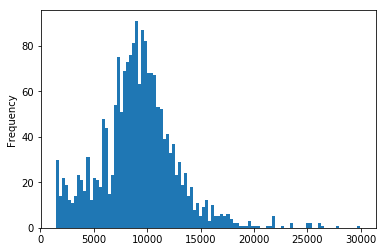

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
encoded['Lot Area'].plot.hist(bins=100)

In [32]:
#transformations (take the logarithm of variables with skewed distributions, add polynomial features)
encoded['log_lotarea'] = encoded['Lot Area'].apply(np.log10)

In [33]:
encoded['log_lotarea'].head(2)

0    3.944236
1    4.007321
Name: log_lotarea, dtype: float64

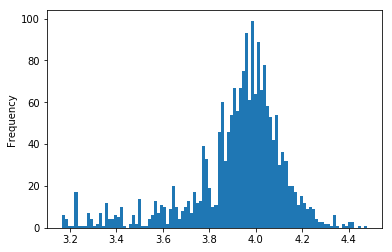

In [34]:
encoded['log_lotarea'].plot.hist(bins=100)

# Models

In [35]:
#Split the data into train and test sets (50-50 split)
from sklearn.model_selection import train_test_split

#### A "simple" model with two variables (three with the target variable)

In [36]:
df_mod1 = encoded[['total_surface', 'Year Built']]

In [37]:
X_tr1, X_te1, y_tr1, y_te1 = train_test_split(df_mod1, y, train_size=0.5, random_state=0)

//anaconda/envs/exts-aml1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [38]:
X_tr1.head(1)

,total_surface,Year Built
450,2283.0,1968


In [39]:
from sklearn.linear_model import LinearRegression
lr1 = LinearRegression()
lr1.fit(X_tr1, y_tr1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
y_pred1 = lr1.predict(X_te1)

#### An "intermediate" model (between 10 and 20 variables) + regularization

In [41]:
df_mod2 = encoded[encoded.columns[:10].append(encoded.columns[-11:])]

In [42]:
df_mod2.head(1)

,MS SubClass,Lot Frontage,Lot Area,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,Year Built,Year Remod/Add,...,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial,rooms_numb,total_surface,newly_built,log_lotarea
0,60,69.145582,8795,1,4,0,7,5,2000,2000,...,0,0,0,0,1,0,12,3208.0,0,3.944236


In [43]:
X_tr2, X_te2, y_tr2, y_te2 = train_test_split(df_mod2, y, train_size=0.5, random_state=0)

//anaconda/envs/exts-aml1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [44]:
#grid search
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error as mse
alphas = np.logspace(-20,10,num = 100)
train_scores = []
test_scores = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_tr2, y_tr2)
    y_pred2 = ridge.predict(X_tr2)
    train_scores.append(mse(y_tr2, y_pred2))
    
    y_pred2_te = ridge.predict(X_te2)
    test_scores.append(mse(y_te2, y_pred2_te))

//anaconda/envs/exts-aml1/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 7.4304687398558706e-31 / 1.1102230246251565e-16
  RuntimeWarning)
//anaconda/envs/exts-aml1/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.4929543016646382e-30 / 1.1102230246251565e-16
  RuntimeWarning)
//anaconda/envs/exts-aml1/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.9996930542260303e-30 / 1.1102230246251565e-16
  RuntimeWarning)
//anaconda/envs/exts-aml1/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill

[]

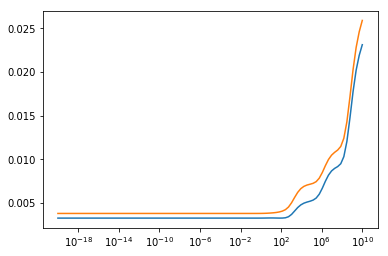

In [45]:
plt.plot(alphas, test_scores, label='test')
plt.plot(alphas, train_scores, label='train')
plt.semilogx()

In [46]:
mini = abs(np.array(train_scores)-np.array(test_scores)).min()
indx = np.where(abs(np.array(train_scores)-np.array(test_scores))==mini)

In [47]:
alphas[indx]

array([4.64158883e-14])

In [48]:
ridge = Ridge(alpha=alphas[indx])
ridge.fit(X_tr2, y_tr2)
y_pred2 = ridge.predict(X_te2)

//anaconda/envs/exts-aml1/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.448918073142392e-24 / 1.1102230246251565e-16
  RuntimeWarning)


In [49]:
X_tr2.columns

Index(['MS SubClass', 'Lot Frontage', 'Lot Area', 'Lot Shape', 'Utilities',
       'Land Slope', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Sale Type_WD ', 'Sale Condition_Abnorml',
       'Sale Condition_AdjLand', 'Sale Condition_Alloca',
       'Sale Condition_Family', 'Sale Condition_Normal',
       'Sale Condition_Partial', 'rooms_numb', 'total_surface', 'newly_built',
       'log_lotarea'],
      dtype='object')

#### A "complex model" with all variables + regularization.

In [50]:
df_mod3 = encoded

In [51]:
X_tr3, X_te3, y_tr3, y_te3 = train_test_split(df_mod3, y, train_size=0.5, random_state=0)

//anaconda/envs/exts-aml1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [52]:
X_tr3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 962 entries, 450 to 860
Columns: 232 entries, MS SubClass to log_lotarea
dtypes: float64(13), int64(41), uint8(178)
memory usage: 580.6 KB


In [53]:
#grid search
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error as mse
alphas = np.logspace(-20,10,num = 100)
train_scores = []
test_scores = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_tr3, y_tr3)
    y_pred3 = ridge.predict(X_tr3)
    train_scores.append(mse(y_tr3, y_pred3))
    
    y_pred3_te = ridge.predict(X_te3)
    test_scores.append(mse(y_te3, y_pred3_te))

//anaconda/envs/exts-aml1/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.1028622493617282e-18 / 1.1102230246251565e-16
  RuntimeWarning)
//anaconda/envs/exts-aml1/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.215994308787169e-18 / 1.1102230246251565e-16
  RuntimeWarning)
//anaconda/envs/exts-aml1/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.45256172789951e-18 / 1.1102230246251565e-16
  RuntimeWarning)
//anaconda/envs/exts-aml1/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-co

[]

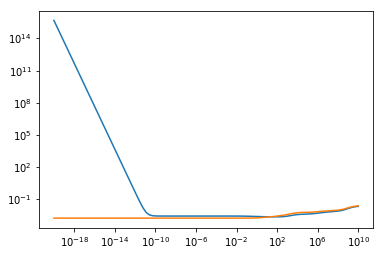

In [54]:
plt.plot(alphas, test_scores, label='test')
plt.plot(alphas, train_scores, label='train')
plt.semilogx()
plt.semilogy()

In [55]:
mini = abs(np.array(train_scores)-np.array(test_scores)).min()
indx = np.where(abs(np.array(train_scores)-np.array(test_scores))==mini)


In [56]:
ridge2 = Ridge(alpha=alphas[indx])
ridge2.fit(X_tr3, y_tr3)
y_pred3 = ridge2.predict(X_te3)

# Model evaluation

1. Root mean squared logarithmic
2. Mean absolute error

In [57]:
def RMSL(y, y_pred):
    return np.sqrt(np.mean(np.square(y-y_pred)))

In [58]:
from sklearn.metrics import mean_absolute_error as MAE

In [59]:
#baseline model: mean and median
mae_base = np.median(10**y_te1)
rmsl_base = np.mean(10**y_te1)

In [60]:
#model 1
rmsl_1 = RMSL(10**y_te1,10**y_pred1)
mae_1 = MAE(10**y_te1, 10**y_pred1)

In [61]:
#model 2
rmsl_2 = RMSL(10**y_te1,10**y_pred2)
mae_2 = MAE(10**y_te1, 10**y_pred2)

In [62]:
#model 3
rmsl_3 = RMSL(10**y_te1,10**y_pred3)
mae_3 = MAE(10**y_te1, 10**y_pred3)

Text(0,0.5,'RMSL')

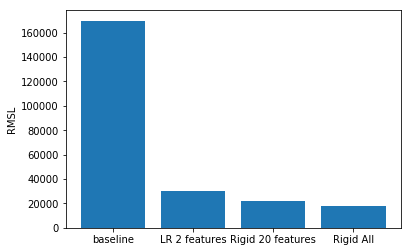

In [63]:
#plot
plt.bar([1,2,3,4], [rmsl_base, rmsl_1, rmsl_2, rmsl_3])
plt.xticks([1,2,3,4], ['baseline', 'LR 2 features', 'Rigid 20 features', 'Rigid All'])
#plt.semilogy()
plt.ylabel("RMSL")

Text(0,0.5,'MAE')

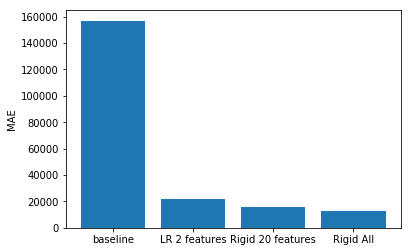

In [64]:
#plot 2
plt.bar([1,2,3,4], [mae_base, mae_1, mae_2, mae_3])
plt.xticks([1,2,3,4], ['baseline', 'LR 2 features', 'Rigid 20 features', 'Rigid All'])
#plt.semilogy()
plt.ylabel("MAE")

# Compute predictions

Use your best model to compute predictions for the 500 houses in ```house-prices-test.csv```. Write your predictions in a ```house-prices-pred.csv```  file. It should contain the identifier of the house ```PID``` and its predicted price ```SalePrice``` . Remember to convert your predictions back into dollars by computing the exponent base 10.

apply the same set of preprocessing steps that you used before  fitting your models on the train data from ```house-prices.csv``` . One solution is to create a ```preprocess(df)``` function and apply it to each data set.
This should be straightforward for the  filling missing values and feature engineering steps, but might be tricky for one-hot encoding since those two  files have different sets of values for some of the categorical variables. Make sure to take a look at the
```encoding-categorical-variables.ipynb``` notebook from the resource section which illustrates the issue and shows different ways to solve it.

In [65]:
to_predict = pd.read_csv("./house-prices-test.csv")
to_predict.head(1)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
0,2217,909279080,50,RL,NaN,11275,Pave,NaN,IR1,HLS,...,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal


In [66]:
to_predict.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [67]:
#additional pre-processing steps
# Encode with integers ordinal ones
features = [['Lot Shape'],['Utilities'],['Land Slope'],['Exter Cond', 'Exter Qual', 'Heating QC', 'Kitchen Qual'],
            ['Garage Qual', 'Bsmt Qual', 'Bsmt Cond'],['Bsmt Exposure'],['BsmtFin Type 1', 'BsmtFin Type 2'],
            ['Garage Finish']]
encoding = [{'Reg':0, 'IR1':1, 'IR2':2, 'IR3':3},{'AllPub':4, 'NoSewr':3, 'NoSeWa':2, 'ELO':1},{'Gtl':0, 'Mod':1, 'Sev':2},
            {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4},{'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5, 'NoGarage':0, 'NoBasement':0},
            {'Gd':4, 'Av':3, 'Mn':2, 'No':1, 'NoBasement':0},{'GLQ': 6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NoBasement':0},
            {'Fin':3, 'RFn':2, 'Unf':1, 'NoGarage':0, 'NoBasement':0}]

for i in range(len(features)):
    print(encoding[i])
    print(features[i])
    to_predict[features[i]] = to_predict[features[i]].replace(encoding[i])
    print(to_predict[features[i]])



{'Reg': 0, 'IR1': 1, 'IR2': 2, 'IR3': 3}
['Lot Shape']
     Lot Shape
0            1
1            0
2            1
3            0
4            0
5            1
6            0
7            1
8            0
9            0
10           1
11           0
12           0
13           0
14           0
15           0
16           0
17           0
18           1
19           0
20           1
21           0
22           0
23           0
24           1
25           0
26           1
27           0
28           1
29           1
..         ...
470          0
471          0
472          0
473          1
474          0
475          0
476          1
477          0
478          0
479          0
480          0
481          1
482          0
483          0
484          1
485          0
486          0
487          1
488          1
489          0
490          0
491          0
492          0
493          0
494          0
495          0
496          1
497          1
498          1
499          0

[500 rows x 1 

In [68]:
def preprocess(df):
    """ repeat data cleaning operations """
    # remove columns with >50% missing values
    #df.drop(['Alley','Pool QC', 'Fence', 'Misc Feature', 'Fireplace Qu'], axis=1, inplace=True)
    #df.dropna(subset=nans_keys[nans_val<21], inplace=True)
    for i in ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure','BsmtFin Type 1', 'BsmtFin Type 2']:
        df[i].fillna(value="NoBasement", inplace=True)     
    for i in ['Garage Type','Garage Finish', 'Garage Qual', 'Garage Cond']:
        df[i].fillna(value="NoGarage", inplace=True)  

        
    df['Lot Frontage'].fillna(value=df['Lot Frontage'].mean(), inplace=True)
    most_freq = int(df['Garage Yr Blt'].value_counts().index[0])
    df['Garage Yr Blt'].fillna(value=most_freq, inplace=True)

    PID = df.PID
    df.drop(['PID', 'Order'], axis=1, inplace=True)
    #one-hot encoding
    nominal = df.select_dtypes(include='object').columns
    #nominal = ['Mas Vnr Type', 'MS SubClass', 'MS Zoning', 'Street', 'Land Contour', 'Lot Config', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Foundation', 'Central Air' , 'Garage Type']
    encoded = pd.get_dummies(df, columns=nominal)
    #feature engineering
    #number of rooms
    encoded['rooms_numb'] = encoded['TotRms AbvGrd'] + encoded['Kitchen AbvGr'] + encoded['Full Bath'] + encoded['Half Bath'] 
    #total surface
    encoded['total_surface'] = encoded['Total Bsmt SF'] + encoded['Gr Liv Area']
    #year of construction is older than some threshold (indicator variables)
    encoded['newly_built'] = encoded['Year Built']>2017
    encoded['newly_built'] = encoded['newly_built'].map({True:1, False:0})
    #transformations (take the logarithm of variables with skewed distributions, add polynomial features)
    encoded['log_lotarea'] = encoded['Lot Area'].apply(np.log10)
    return encoded, PID, y
to_predict, PID, y = preprocess(to_predict)

In [69]:
#reindex DataFrame
df_pred = to_predict.reindex(
    columns=encoded.columns,
    fill_value=0 # Fill with 0s
)

In [70]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 232 entries, MS SubClass to log_lotarea
dtypes: float64(13), int64(67), uint8(152)
memory usage: 386.8 KB


In [71]:
#any nans left?
df_pred.isnull().sum()[df_pred.isnull().sum()>0]

Mas Vnr Area    3
dtype: int64

In [72]:
df_pred.fillna(value=0, inplace=True)

In [73]:
#predict 
y_pred4 = ridge2.predict(df_pred)

In [74]:
# Convert predictions to dollars
predictions = 10**y_pred4
# Create DataFrame for predictions
predictions_df = pd.DataFrame.from_items([
    ('PID', PID),
    ('SalePrice', predictions)
])

In [75]:
#verify distribution
predictions_df.SalePrice.describe()

count    5.000000e+02
mean     1.694329e+05
std      8.483456e+04
min      4.473453e+04
25%      1.200699e+05
50%      1.500121e+05
75%      1.953080e+05
max      1.120068e+06
Name: SalePrice, dtype: float64

In [76]:
(10**y).describe()

count      1924.000000
mean     169798.417360
std       66272.228756
min       12789.000000
25%      126000.000000
50%      155000.000000
75%      201617.500000
max      492000.000000
Name: LogSalePrice, dtype: float64

In [77]:
# Save data
predictions_df.to_csv('house-prices-pred.csv', index=False, float_format='%.0f')